In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore

Unique values in each feature :
Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], Length: 7
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], Length: 30
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], Length: 41
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], Length: 12
Country: ['India'], Length: 1
Gender: [0 1], Length: 2

 Statistical analysis of the data: 
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.

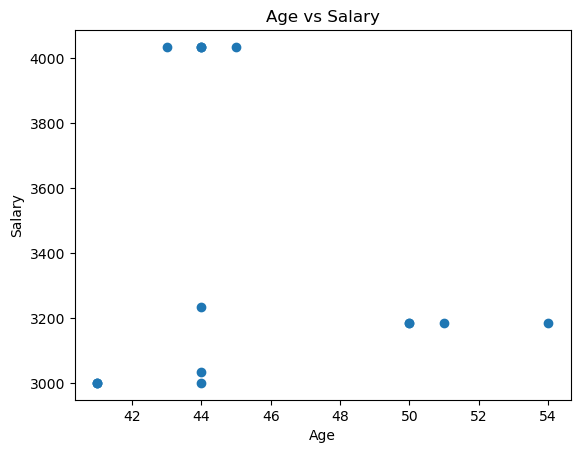

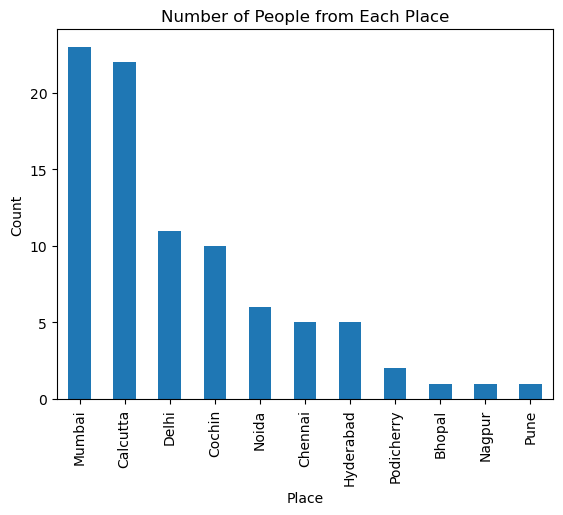

In [3]:
# define the datapreprocessing class
class DataPreprocessing:
    def __init__(self,filename):
        self.df=pd.read_csv(filename)
        
    # data exploration method
    def explore_data(self):
        print("Unique values in each feature :")
        for col in self.df.columns:
            unique_values=self.df[col].unique()
            print(f"{col}: {unique_values}, Length: {len(unique_values)}")

        print("\n Statistical analysis of the data: ")
        print(self.df.describe())

    # data cleaning methods
    def clean_data(self):
        self.df["Age"].replace(0,np.nan,inplace=True)
        #  Drop rows with any missing values
        self.df.dropna(inplace=True)

    # method to handle outliers
    def find_outliers(self):
        # Identify numeric columns for outlier detection
        numeric_cols = self.df.select_dtypes(include=np.number).columns
        
        # Detect outliers using z-score
        z_scores = zscore(self.df[numeric_cols])
        abs_z_scores = np.abs(z_scores)
        outlier_rows = (abs_z_scores > 3).any(axis=1)
        
        # Replace outlier values with median
        self.df[numeric_cols] = self.df[numeric_cols].mask(outlier_rows, self.df[numeric_cols].median(),axis=0)

    # data analysis methods
    def analyze_data(self):
        filtered_data=self.df[(self.df["Age"]>40)&(self.df["Salary"]<5000)]
        # plot age and salary
        plt.scatter(filtered_data["Age"],filtered_data["Salary"])
        plt.xlabel('Age')
        plt.ylabel('Salary')
        plt.title('Age vs Salary')
        plt.show()
        # count people from each place
        place_counts=self.df["Place"].value_counts()
        place_counts.plot(kind='bar', title='Number of People from Each Place')
        plt.xlabel('Place')
        plt.ylabel('Count')
        plt.show()

    # data encoding method
    def encode_data(self):
        # conert categorical variables into numerical representation using onehotencoding
        # Select categorical columns
        categorical_cols = self.df.select_dtypes(include=["object"]).columns
        
        # One-hot encode categorical columns
        one_hot_encoder = OneHotEncoder(drop='first')
        encoded_data = one_hot_encoder.fit_transform(self.df[categorical_cols])
        
        # Get the names of the new encoded columns
        encoded_columns = one_hot_encoder.get_feature_names_out(categorical_cols)
        
        # Create a DataFrame with the encoded data
        encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)
        
        # Concatenate the original DataFrame with the encoded DataFrame
        self.df = pd.concat([self.df, encoded_df], axis=1)
        
        # Drop the original categorical columns
        self.df.drop(categorical_cols, axis=1, inplace=True)
     # feature scaling method
    def scale_features(self):
          # StandardScaler
        scaler_standard = StandardScaler()
        scaled_features_standard = scaler_standard.fit_transform(self.df[['Age', 'Salary']])
        self.df[['age_standard', 'salary_standard']] = scaled_features_standard
        
        # MinMaxScaler
        scaler_minmax = MinMaxScaler()
        scaled_features_minmax = scaler_minmax.fit_transform(self.df[['Age', 'Salary']])
        self.df[['age_minmax', 'salary_minmax']] = scaled_features_minmax

# Create an instance of DataPreprocessing
preprocessor = DataPreprocessing("Employee.csv")

# Perform data exploration
preprocessor.explore_data()

# Clean the data
preprocessor.clean_data()

# Find and handle outliers
preprocessor.find_outliers()

# Analyze the data
preprocessor.analyze_data()

# Encode categorical variables
preprocessor.encode_data()

# Scale features
preprocessor.scale_features()